# <Chapter 02_사이킷런으로 시작하는 머신러닝>

# 01 사이킷런 소개와 특징

설치된 사이킷런의 버전 확인

In [3]:
import sklearn
print(sklearn.__version__)

1.0.2


# 02 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기

사이킷런에서 사용할 모듈 임포트

In [4]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

붓꽃 데이터 세트 로딩 후 DataFrame으로 변환

In [5]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

# iris.data는 iris 데이터 세트에서 feature만으로 된 데이터를 numpy로 가짐
iris_data = iris.data

# iris.target은 iris 데이터 세트에서 label만으로 된 데이터를 numpy로 가짐
iris_label = iris.target

print('iris target 값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트 DataFrame으로 변환
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target 값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


학습용 데이터와 테스트용 데이터 분리

In [6]:
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

DecisionTreeClassifier 객체 생성

In [7]:
dt_clf = DecisionTreeClassifier(random_state=11)

학습용 피처 데이터 속성, 결정값 데이터 세트 입력하여 학습 수행

In [8]:
dt_clf.fit(X_train, y_train)    # fit()메서드 사용

DecisionTreeClassifier(random_state=11)

학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행

In [9]:
pred = dt_clf.predict(X_test)   # predict() 메서드 사용

DecisionTreeClassifier의 예측 성능 평가: 정확도

In [10]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


붓꽃 데이터 세트로 분류 예측한 process 정리
1. 데이터 세트 분리: 데이터를 학습 데이터와 테스트 데이터로 분리한다.
2. 모델 학습: 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킨다.
3. 예측 수행: 학습된 ML 모델을 이용해 테스트 데이터의 분류(붓꽃 종류)를 예측한다.
4. 평가: 예측된 결괏값과 테스트 데이터의 실제 결괏값을 비교해 ML 모델 성능을 평가한다. 

# 03 사이킷런의 기반 프레임워크 익히기

## 03.1 Estimator 이해 및 fit(), predict() 메서드

Classifier: 분류(Classification) 알고리즘을 구현한 클래스

Regressor: 회귀(Regression) 알고리즘을 구현한 클래스

Estimator: Classifier와 Regressor를 합친 클래스. 즉, 지도학습의 모든 알고리즘을 구현한 클래스

지도학습에서 ML 모델 학습을 위해 fit(), 학습된 모델의 예측을 위해 predict() 메서드 사용

## 03.2 사이킷런의 주요 모듈

자주 쓰이는 핵심 모듈의 종류는 다음과 같다.
1. 예제 데이터 모듈
2. 피처 처리 모듈
3. 피처 처리 & 차원 축소 모듈
4. 데이터 분리, 검증 & 파라미터 튜닝 모듈
5. 평가 모듈
6. ML 알고리즘 모듈
7. 유틸리티 모듈

## 03.3 내장된 예제 데이터 세트

붓꽃 데이터 세트를 생성하는 내장 API 반환 결과의 클래스 확인: Bunch 클래스는 파이썬 딕셔너리 자료형과 유사

In [11]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


load_iris() 데이터 세트의 key 값 확인

In [12]:
keys = iris_data.keys()
print('붓꽃 데이터 세트의 키들:', keys)

붓꽃 데이터 세트의 키들: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [13]:
print('\n feature_names의 type:', type(iris_data.feature_names))
print('feature_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print('target의 shpae:', iris_data.target.shape)
print(iris_data.target)


 feature_names의 type: <class 'list'>
feature_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 

# 04 Model Selection 모듈 소개

## 04.1 학습/테스트 데이터 세트 분리 - train_test_split()

잘못된 예: 학습과 예측을 동일한 데이터 세트로 수행한 결과

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


테스트 데이터 세트를 전체의 30%, 학습 데이터 세트를 70%로 분리하여 예측을 수행한 결과

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, \
                                                    test_size=0.3, random_state=121)
# 학습 데이터를 기반으로 DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)

# 이 모델을 이용하여 예측 정확도 측정
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


## 04.2 교차 검증

과적합(Overfitting): 모델이 학습 데이터에만 과도하게 최적화되어, 실제 예측을 \
다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것\
\
교차 검증: 고정된 학습 데이터와 테스트 데이터로 평가를 하다 보면 생기는 데이터 편중을 막기 위해,\
별도의 여러 세트로 구성된 학습 데이터와 검증 데이터 세트에서 학습과 평가를 수행하는 것

### 04.2.1 K 폴드 교차 검증

사이킷런에서는 K 폴드 교차 검증을 구현하기 위해 KFold와 StratifiedKFold 클래스를 제공\
붓꽃 데이터 세트와 DecisionTreeClassifier 생성 후 5개의 폴드 세트로 분리하는 KFold 객체 생성

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


* KFold로 데이터를 학습하고 예측하는 코드는 다음과 같은 형식으로 이루어진다.
1. 폴드 세트를 설정
2. for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출
3. 반복적으로 학습과 예측을 수행하고 예측 성능을 반환

In [21]:
n_iter = 0

# KFold객체의 split( ) 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환  
for train_index, test_index  in kfold.split(features):
    # kfold.split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복 시 마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]

#2 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97
 98 99]

#3 교차 검증 정확도 :0.0, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117
 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.0


### 04.2.2 Stratified K 폴드

불균형한 분포도를 가진 레이블 데이터 집합: 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것\
e.g. 대출 사기 데이터: 약 1억 건의 데이터 세트 중 대부분의 데이터는 정상 대출이고 전체의 0.0001% 정도가 대출 사기 레이블
* 문제점: K 폴드로 랜덤하게 학습 및 테스트 세트의 인덱스를 고르더라도 레이블 값인 0과 1의 비율을 제대로 반영하지 못하는 경우가 쉽게 발생
* 결론: 원본 데이터와 유사한 '중요 레이블 값의 분포'를 학습/테스트 세트에도 유지하는 것이 중요

Stratified K 폴드: 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식으로, 원본 데이터의 레이블 분포를 먼저 고려한 뒤 이 분포와 동일하게 학습과 검증 데이터 세트를 분배
* K 폴드가 가진 문제점을 확인해보는 예제의 코드는 아래와 같다.

In [19]:
import pandas as pd

iris=load_iris()
iris_df=pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

0    50
1    50
2    50
Name: label, dtype: int64

교차 검증 시마다 3개의 폴드 세트로 만들어지는 학습 레이블과 검증 레이블이 완전히 다른 값으로 추출되므로, 이러한 유형으로 교차 검증 데이터 세트를 분할 시, 검증 예측 정확도가 0이 되는 문제점 발생

In [20]:
# 이슈가 발생하는 현상 도출, 각 교차 검증 시마다 생성되는 학습/검정 레이블 데이터 값의 분포도 확인
kfold=KFold(n_splits=3)
n_iter=0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 1    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 0    50
2    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


* StratifiedKFold로 동일한 데이터 분할 수행 후 학습/검증 레이블 데이터의 분포도 확인\
KFold와 StratifiedKFold 차이점: StratifiedKFold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split() 메서드에 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 인자로 입력해줘야 함.

In [22]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
0    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
1    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
0    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    17
2    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
1    33
2    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
2    17
0    16
Name: label, dtype: int64


* StratifiedKFold 이용해 붓꽃 데이터 교차 검증

In [23]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.round(np.mean(cv_accuracy), 4))


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9667


### 04.2.3 교차 검증을 보다 간편하게 - cross_val_score()

사이킷런이 제공하는 cross_cal_score(): 내부적으로 StratifiedKFold를 이용하여(회귀인 경우 KFold 이용) Estimator를 학습(fit), 예측(predict), 평가(evaluation)하는 일련의 과정을 한꺼번에 수행해주는 API

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score , cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도(accuracy) , 교차 검증 세트는 3개 
scores = cross_val_score(dt_clf , data , label , scoring='accuracy',cv=3)
print('교차 검증별 정확도:',np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


## 04.3 GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한 번에

학습 데이터와 테스트 데이터 먼저 분리 후, 학습 데이터에서 최적 하이퍼 파라미터 추출

In [25]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이타와 테스트 데이터 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, 
                                                    test_size=0.2, random_state=121)
dtree = DecisionTreeClassifier()

### parameter 들을 dictionary 형태로 설정
parameters = {'max_depth':[1,2,3], 'min_samples_split':[2,3]}

주요 칼럼 발췌

In [26]:
import pandas as pd

# param_grid의 하이퍼 파라미터들을 3개의 train, test set fold 로 나누어서 테스트 수행 설정.  
### refit=True 가 default 임. True이면 가장 좋은 파라미터 설정으로 재 학습 시킴.  
grid_dtree = GridSearchCV(dtree, param_grid=parameters, cv=3, refit=True)

# 붓꽃 Train 데이터로 param_grid의 하이퍼 파라미터들을 순차적으로 학습/평가 .
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


GridSwearchCV의 속성을 이용해 최적 하이퍼 파라미터의 값과 그 때의 정확도 구하기

In [28]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750


분리한 테스트 데이터 세트에 대해 예측 후 성능평가

In [29]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.9667


# 05 데이터 전처리

## 05.1 데이터 인코딩

### 05.1.1 레이블 인코딩

In [30]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [31]:
print('인코딩 클래스:',encoder.classes_)

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


In [32]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


### 05.1.2 원-핫 인코딩(One-Hot Encoding)

In [33]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환 
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [34]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


## 05.2 피처 스케일링과 정규화

피처 스케일링(Feature Scaling): 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업

* 표준화(Standardization): 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것
* 정규화(Normalization): 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 것\
(책에서 말하는 벡터 정규화는 선형대수 개념의 정규화를 지칭하고, 일반적 의미의 표준화와 정규화는 피처 스케일링이라는 표현으로 통칭한다.)

## 05.3 StandardScaler

In [35]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())

feature 들의 평균 값
sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [36]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

feature 들의 평균 값
sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


## 05.4 MinMaxScaler

In [37]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())

feature들의 최솟값
sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature들의 최댓값
sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


## 05.5 학습 데이터와 테스트 데이터의 스케일링 변환 시 유의점

* 테스트 데이터에 fit()을 적용할 때 발생하는 문제점

In [38]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [39]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


* fit()을 호출해 스케일링 기준 정보를 다시 적용한 뒤 transform()을 수행하여 테스트 데이터를 변환한 결과

In [40]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


* 데이터에 fit()을 호출하지 않고 학습 데이터로 fit()을 수행한 MinMaxScaler 객체의 transform()을 이용해 데이터를 변환한 결과

In [41]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


# 06 사이킷런으로 수행하는 타이타닉 생존자 예측

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [43]:
print('\n ### train 데이터 정보 ###  \n')
print(titanic_df.info())


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [44]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ',titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [45]:
print(' Sex 값 분포 :\n',titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n',titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n',titanic_df['Embarked'].value_counts())

 Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [46]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [47]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

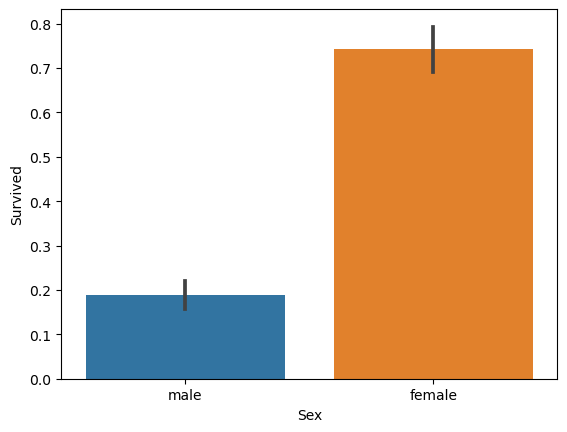

In [48]:
sns.barplot(x='Sex', y = 'Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

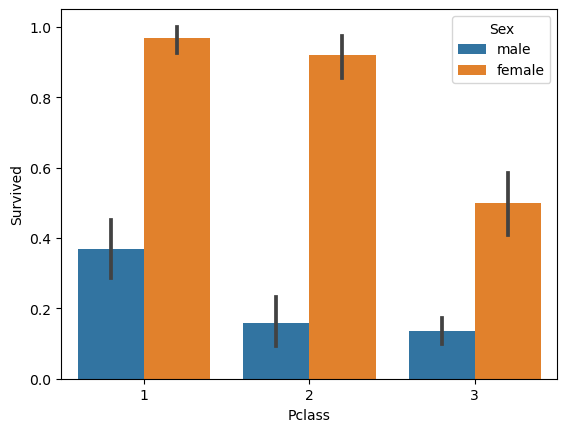

In [49]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

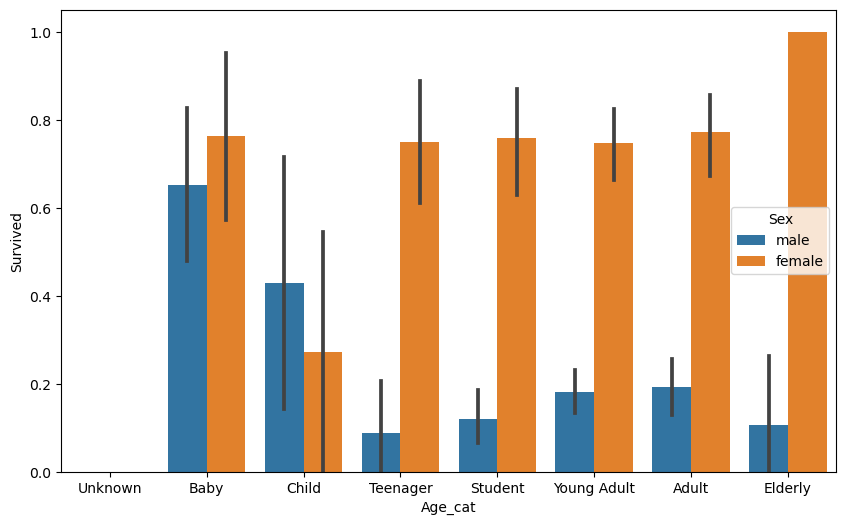

In [50]:
# 입력 age에 따라 구분값을 반환하는 함수 설정. DataFrame의 apply lambda식에 사용. 
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정 
plt.figure(figsize=(10,6))

#X축의 값을 순차적으로 표시하기 위한 설정 
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category( ) 함수를 반환값으로 지정. 
# get_category(X)는 입력값으로 'Age' 컬럼값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y = 'Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [51]:
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [52]:
from sklearn.preprocessing import LabelEncoder

# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 피처 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행.
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [53]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=11)

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 결정트리, Random Forest, 로지스틱 회귀를 위한 사이킷런 Classifier 클래스 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression(solver='liblinear')

# DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train , y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

# RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train , y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

# LogisticRegression 학습/예측/평가
lr_clf.fit(X_train , y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8547
LogisticRegression 정확도: 0.8659


In [56]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    # 폴드 세트를 5개인 KFold객체를 생성, 폴드 수만큼 예측결과 저장을 위한  리스트 객체 생성.
    kfold = KFold(n_splits=folds)
    scores = []
    
    # KFold 교차 검증 수행. 
    for iter_count , (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # X_titanic_df 데이터에서 교차 검증별로 학습과 검증 데이터를 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        
        # Classifier 학습, 예측, 정확도 계산 
        clf.fit(X_train, y_train) 
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     
    
    # 5개 fold에서의 평균 정확도 계산. 
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 
# exec_kfold 호출
exec_kfold(dt_clf , folds=5) 

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [57]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5], 'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters , scoring='accuracy' , cv=5)
grid_dclf.fit(X_train , y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

# GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행. 
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test , dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
